In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
df = pd.read_csv("HDHI Admission data.csv")
df.head(5)

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df['D.O.A'] = pd.to_datetime(df['D.O.A'], errors='coerce')
np.random.seed(42)

departments = ['Cardiology', 'Neurology', 'General Medicine', 'ICU', 'Pulmonology', 'Surgery']
df['department'] = np.random.choice(departments, size=len(df))

room_types = ['General', 'Private', 'Semi-Private']
df['room_type'] = np.random.choice(room_types, size=len(df))


df['previous_visits'] = np.random.randint(0, 6, size=len(df))

# **1. What is the total number of admissions?**

In [23]:
print("1. Total Admissions =", len(df))

1. Total Admissions = 15757


# **2. What is the distribution of gender among admitted patients?**

In [24]:
print("2. Gender Distribution:\n", df['GENDER'].value_counts())

2. Gender Distribution:
 GENDER
M    9990
F    5767
Name: count, dtype: int64


# **3. Which age group is most frequently admitted?**

In [25]:
age_bins = [0, 18, 30, 45, 60, 75, 100]
age_labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76+']
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels)
print("3. Age Group Distribution:\n", df['AGE_GROUP'].value_counts().sort_index())

3. Age Group Distribution:
 AGE_GROUP
0-18       73
19-30     319
31-45    1449
46-60    5300
61-75    6535
76+      2079
Name: count, dtype: int64


# **4. What are the most common admission types?**

In [26]:
print("4. Admission Type Distribution:\n", df['TYPE OF ADMISSION-EMERGENCY/OPD'].value_counts())


4. Admission Type Distribution:
 TYPE OF ADMISSION-EMERGENCY/OPD
E    10924
O     4833
Name: count, dtype: int64


# **5. Which departments have the highest number of admissions?**

In [27]:
print("5. Most Common Departments:\n", df['department'].value_counts())

5. Most Common Departments:
 department
Pulmonology         2687
Neurology           2648
Cardiology          2645
ICU                 2632
Surgery             2594
General Medicine    2551
Name: count, dtype: int64


# **6. What room type is most frequently assigned?**

In [28]:
print("6. Most Common Room Types:\n", df['room_type'].value_counts())

6. Most Common Room Types:
 room_type
Private         5290
Semi-Private    5272
General         5195
Name: count, dtype: int64


# **7. On which day of the week do most patients get admitted?**

In [30]:
df['ADMISSION_DAY'] = df['D.O.A'].dt.day_name()
print("\n7. Admission Day Distribution:\n", df['ADMISSION_DAY'].value_counts())
print("Most Common Day:", df['ADMISSION_DAY'].value_counts().idxmax())


7. Admission Day Distribution:
 ADMISSION_DAY
Monday       1614
Tuesday      1556
Thursday     1441
Friday       1439
Saturday     1393
Wednesday    1373
Sunday       1286
Name: count, dtype: int64
Most Common Day: Monday


# **8. What percentage of patients have visited before (previous_visits > 0)?**

In [31]:
percent_prev_visits = (df['previous_visits'] > 0).mean() * 100
print(f"\n8. Patients with Previous Visits (>0): {percent_prev_visits:.2f}%")


8. Patients with Previous Visits (>0): 83.59%


# **9. Is there a difference in admission types across genders?**

In [32]:
print("\n9. Admission Type by Gender:\n",
      df.groupby(['GENDER', 'TYPE OF ADMISSION-EMERGENCY/OPD']).size().unstack(fill_value=0))


9. Admission Type by Gender:
 TYPE OF ADMISSION-EMERGENCY/OPD     E     O
GENDER                                     
F                                4055  1712
M                                6869  3121


# **10. Create 3 visualizations to represent interesting patterns in the data.**

/tmp/ipython-input-42-81237434.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GENDER', data=df, palette='Set2')
/tmp/ipython-input-42-81237434.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values, palette='Blues_d')
/tmp/ipython-input-42-81237434.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_counts.index, y=dept_counts.values, palette='crest')


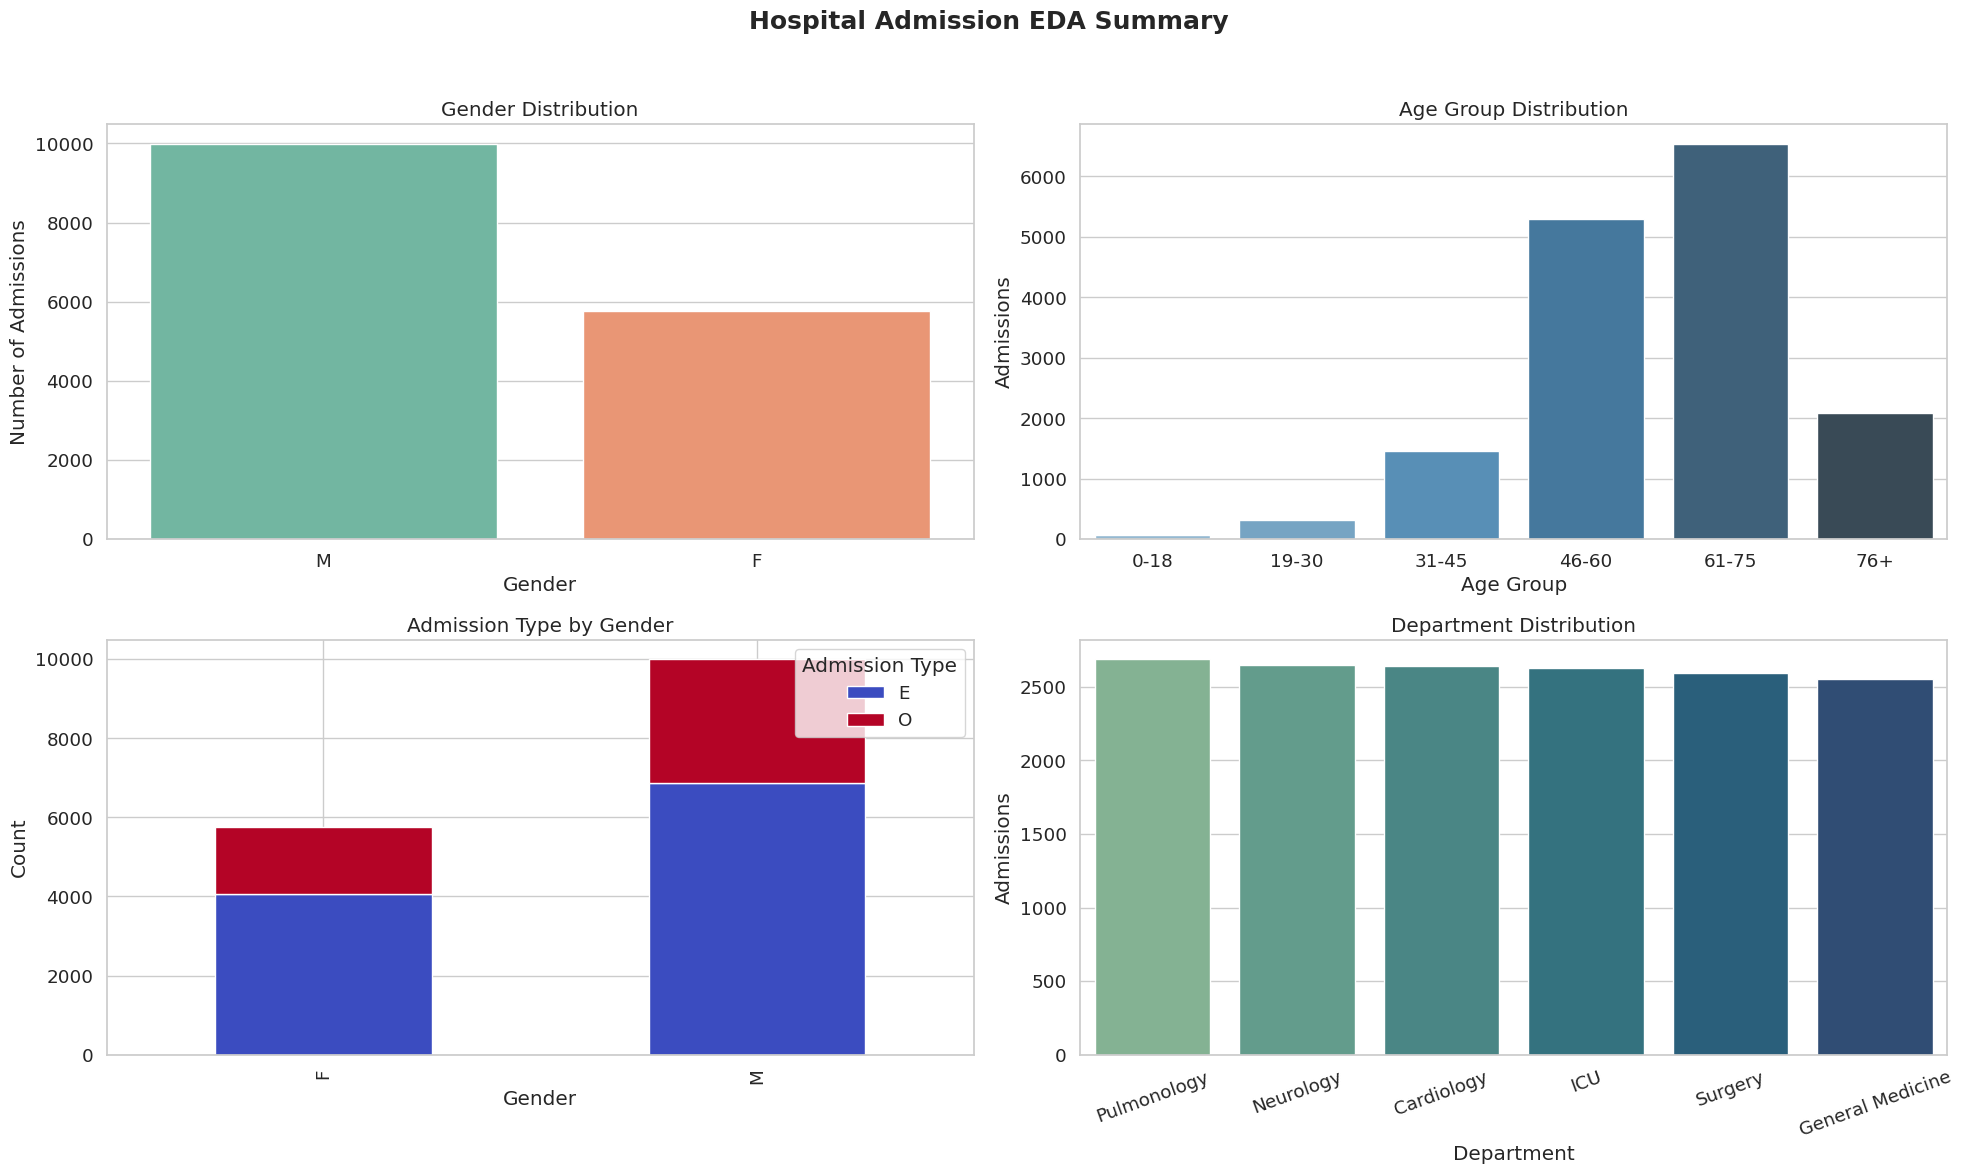

In [42]:
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='GENDER', data=df, palette='Set2')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Admissions")

plt.subplot(2, 2, 2)
age_counts = df['AGE_GROUP'].value_counts().sort_index()
sns.barplot(x=age_counts.index, y=age_counts.values, palette='Blues_d')
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Admissions")

plt.subplot(2, 2, 3)
admission_gender = df.groupby(['GENDER', 'TYPE OF ADMISSION-EMERGENCY/OPD']).size().unstack()
admission_gender.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='coolwarm')
plt.title("Admission Type by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Admission Type", loc='upper right')

plt.subplot(2, 2, 4)
dept_counts = df['department'].value_counts()
sns.barplot(x=dept_counts.index, y=dept_counts.values, palette='crest')
plt.title("Department Distribution")
plt.xlabel("Department")
plt.ylabel("Admissions")
plt.xticks(rotation=20)

plt.suptitle("Hospital Admission EDA Summary", fontsize=18, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()